In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from model.unet import Unet
from model.diffusion import DiffusionModel
from model.dataset import CustomDataset
from train import train

# training hyperparameters
BATCH_SIZE = 32
EPOCHS = 5000
LR = 1e-3
# network hyperparameters
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
N_FEAT = 64 # 64 hidden dimension feature
MAX_TEXT_LEN = 128
HEIGHT = 64
SAVE_DIR = './weights/'
GEN_DIR = './generated_images/'
# diffusion hyperparameters
TIMESTEPS = 500

# DataSet path
dataset_path = './dataset/conceptual_captions_c.npy'

torch.cuda.is_available()

c:\Users\david\miniconda3\envs\PyTorch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

## Entrenamiento

In [ ]:
model = Unet(in_channels=3, n_feat=N_FEAT, max_text_len=MAX_TEXT_LEN, height=HEIGHT, device=DEVICE).to(DEVICE)
#model.load_state_dict(torch.load(SAVE_DIR+"model_5000.pth", map_location=DEVICE))
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
df = DiffusionModel(TIMESTEPS, HEIGHT)

dataset = CustomDataset(dataset_path)

train(model, df, optimizer, dataset, EPOCHS, BATCH_SIZE, DEVICE, SAVE_DIR)

## Generación

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Imagenes generadas


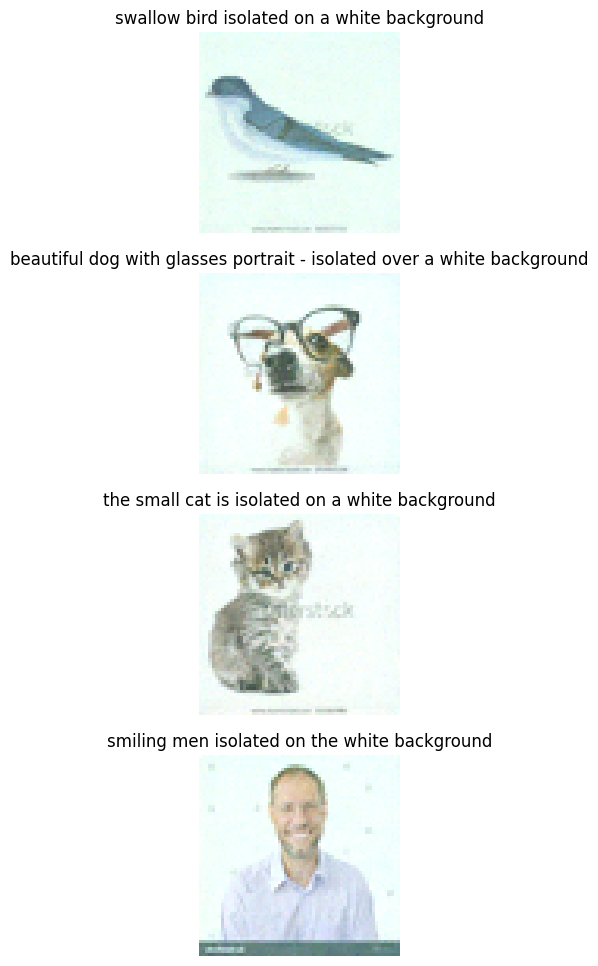

In [12]:
dataset = CustomDataset(dataset_path)
df = DiffusionModel(TIMESTEPS, HEIGHT)
model = Unet(in_channels=3, n_feat=N_FEAT, max_text_len=MAX_TEXT_LEN, height=HEIGHT, device=DEVICE).to(DEVICE)
model.load_state_dict(torch.load(SAVE_DIR+"model_5000.pth", map_location=DEVICE))
model.eval()

a = ("swallow bird isolated on a white background",
"beautiful dog with glasses portrait - isolated over a white background",
"the small cat is isolated on a white background",
"smiling men isolated on the white background")

samples = df.sample_ddpm_context(model, 4, a,save_rate=TIMESTEPS//20)

samples = samples.detach().cpu().numpy()
plt.figure(figsize=(3, 3*len(a)))
for i, img in enumerate(samples):
    plt.subplot(len(a), 1, i + 1)
    plt.axis('off')
    img = df.unorm(img)
    plt.title(a[i])
    plt.imshow(np.transpose(img, (1,2,0)))

print('Imagenes generadas')